# Scratch Pad for Group EDA Case Study

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Import our data files
df = pd.read_csv('../data/USvideos.csv')
df_cat = pd.read_json('../data/US_category_id.json')

In [6]:
# The json file holds a dictionary value that correlates to the category_id in our .csv, so we will extract those values
df_two = pd.DataFrame(df_cat['items'].apply(lambda x: x['snippet']['title']).reset_index())

In [7]:
# Prep the .json data to be merged into the .csv dataframe
df_two.rename(columns={'index': 'category_id'}, inplace=True)
df = pd.merge(df, df_two)

In [8]:
# Clean up by dropping unneeded columns and reorganizing the remaining columns logically
df = df.drop(['video_id', 'thumbnail_link'], axis=1)
df.rename(columns={'items': 'category'}, inplace=True)
df = df[['title', 'channel_title', 'category_id', 'category', 'tags', 'description', 'publish_time', 'trending_date', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']]

In [9]:
# Provide uniformity among our date and time fields
df.insert(loc=6, column='publish_date', value=pd.to_datetime(df['publish_time']).dt.date) # Create a column with just the publish day and place it in the proper spot in our dataframe
df['publish_date'] = pd.to_datetime(df['publish_date'])                                   # Putting dt.date brought it back in as an object, so ensure it is converted to datetime
df['publish_time'] = pd.to_datetime(df['publish_time']).dt.time                           # Convert this column to date time and extract the time
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')              # Convert this column to datetime in a normal YYYY-MM-DD format

In [10]:
# The description column contains null values, so we will annotate where no description was available
df['description'] = df['description'].fillna('No description available')
df.insert(loc=9, column='days_before_viral', value=df['trending_date']-df['publish_date'])   # Create a column to show how many days it took for a video to go viral
df['days_before_viral'] = df['days_before_viral'].astype(int)                                # Convert the timedelta to an integer representing number of days


In [ ]:
# Adding columns to display total engagements and engagement rate per number of views
df.insert(loc=14, column='engagements', value=df['likes'] + df['dislikes'] + df['comment_count'])
df.insert(loc=15, column='engagement_rate', value= df['engagements'] / df['views'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40892 entries, 0 to 40891
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   40892 non-null  object        
 1   channel_title           40892 non-null  object        
 2   category_id             40892 non-null  int64         
 3   category                40892 non-null  object        
 4   tags                    40892 non-null  object        
 5   description             40892 non-null  object        
 6   publish_date            40892 non-null  datetime64[ns]
 7   publish_time            40892 non-null  object        
 8   trending_date           40892 non-null  datetime64[ns]
 9   days_before_viral       40892 non-null  int64         
 10  views                   40892 non-null  int64         
 11  likes                   40892 non-null  int64         
 12  dislikes                40892 non-null  int64 

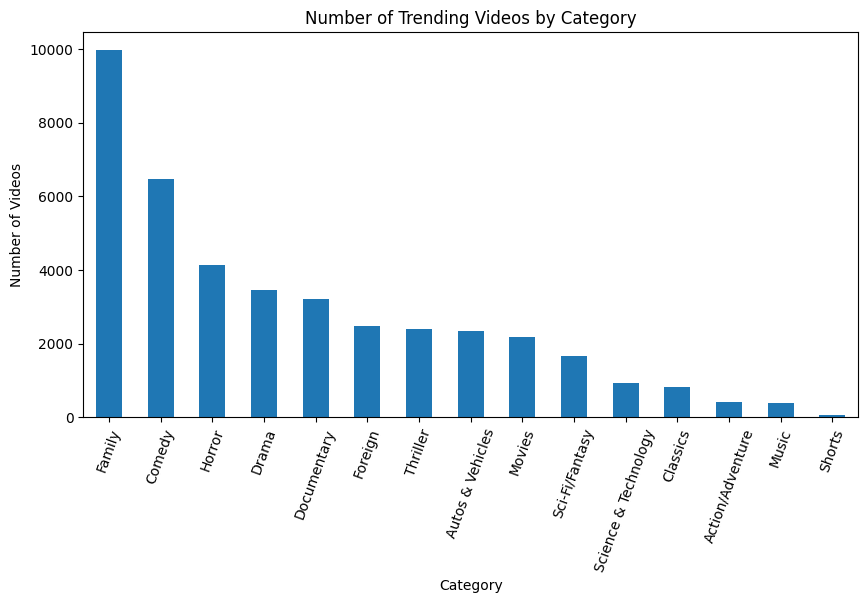

In [12]:
# BAR CHART OF NUMBER OF TRENDING VIDEOS BY CATEGORY
df['category'].value_counts().plot(kind='bar', 
                                   title='Number of Trending Videos by Category', 
                                   xlabel='Category', 
                                   ylabel='Number of Videos', 
                                   figsize=(10,5))
plt.xticks(rotation=70)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

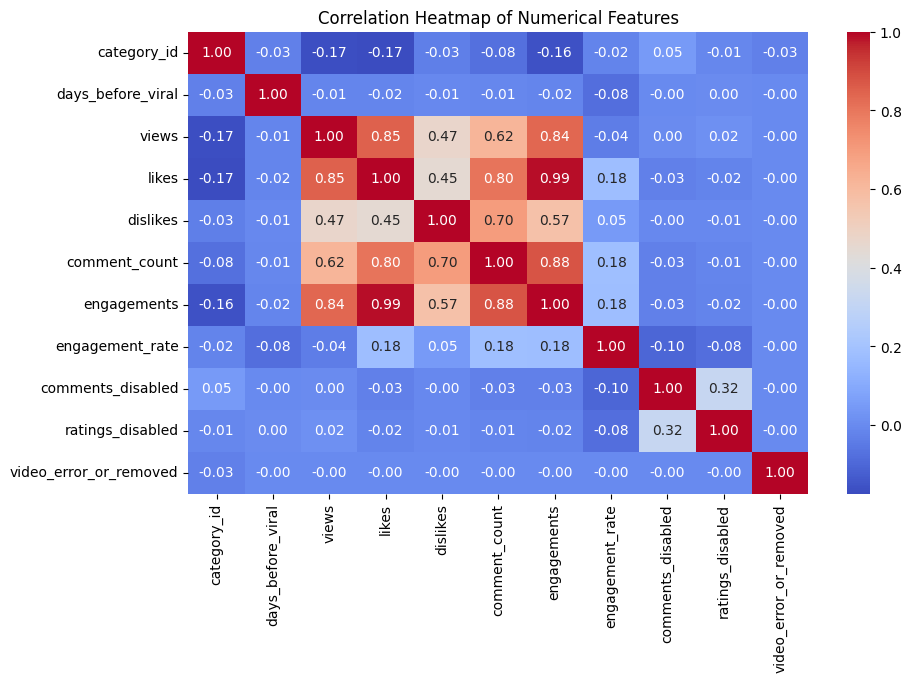

In [13]:
# HEATMAP OF CORRELATION BETWEEN NUMERICAL FEATURES
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numerical Features')

Text(0.5, 1.0, 'Likes vs. Comment Count')

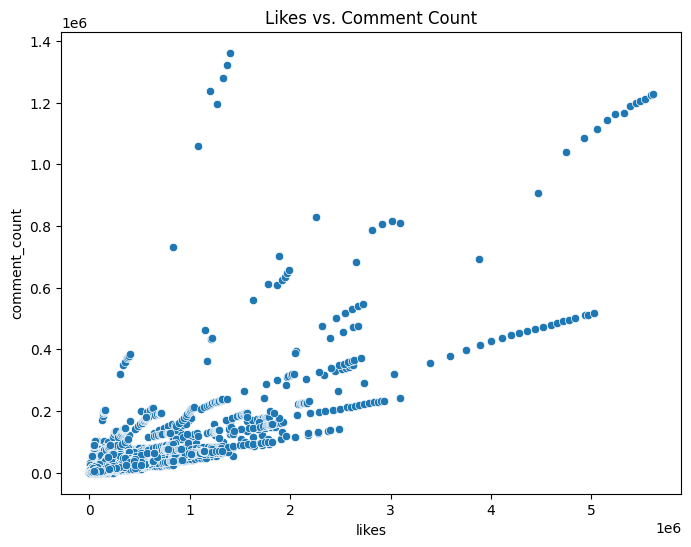

In [14]:
# LIKES VS COMMENTS SCATTER PLOT
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='likes', y='comment_count')
plt.title('Likes vs. Comment Count')

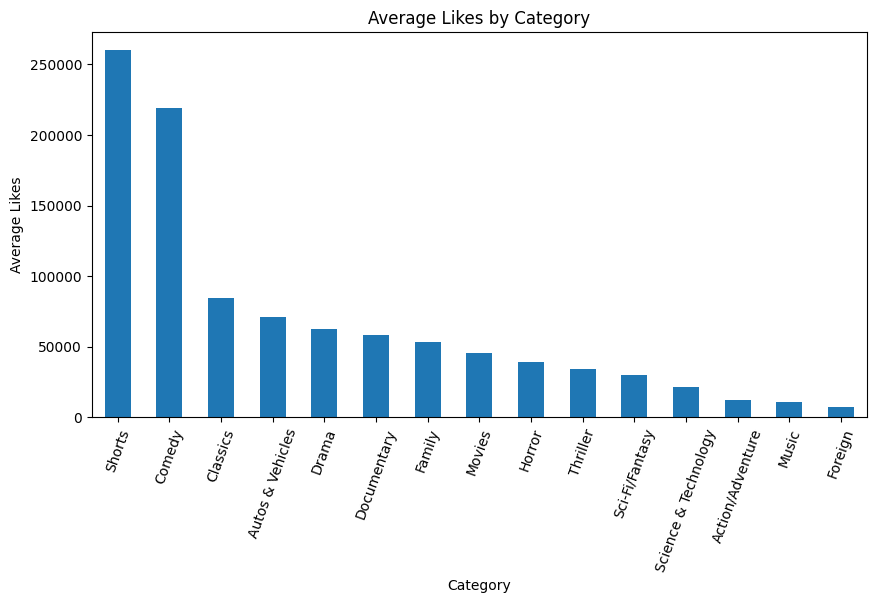

In [15]:
# AVERAGE RATING BY CATEGORY BAR CHART
avg_likes_by_category = df.groupby('category')['likes'].mean().sort_values(ascending=False)
avg_likes_by_category.plot(kind='bar', 
                           title='Average Likes by Category',
                            xlabel='Category',
                            ylabel='Average Likes',
                            figsize=(10,5))
plt.xticks(rotation=70)
plt.show()